In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [2]:
offense = pd.read_csv('offensive_data.csv')
dst = pd.read_csv('dst_data.csv')
kickers = pd.read_csv('kicker_data.csv')

In [3]:
offense.head()

,Unnamed: 0,Player,Game,Pts*,Att,Cmp,Yds,TD,Int,2Pt,...,Rec,Yds.2,TD.2,2Pt.2,FL,TD.3,Week,Position,Year,target
0,0,Andrew Luck,DET@IND,43.0,47,31,385,4,0,1,...,0,0,0,0,0,0,1,QB,2016,12.0
1,1,Drew Brees,OAK@NO,39.0,42,28,423,4,0,0,...,0,0,0,0,1,0,1,QB,2016,16.0
2,2,Jameis Winston,TB@ATL,33.0,32,23,281,4,1,0,...,0,0,0,0,0,0,1,QB,2016,6.0
3,3,Alex Smith,SD@KC,31.0,48,34,363,2,1,0,...,0,0,0,0,0,0,1,QB,2016,5.0
4,4,Matthew Stafford,DET@IND,31.0,39,31,340,3,0,0,...,0,0,0,0,0,0,1,QB,2016,17.0


In [4]:
dst.head()

,Unnamed: 0,Team,Game,Pts*,Sack,Int,Saf,FR,Blk,TD,PA,PassYds,RushYds,TotYds,Week,Position,Year,Target,Opponent
0,0,MIN,MIN@TEN,24.0,2.0,1,0,2,0,2,16,252,64,316,1,DST,2016,15.0,TEN
1,1,SF,LA@SF,16.0,2.0,2,0,0,0,0,0,120,65,185,1,DST,2016,11.0,LA
2,2,MIA,MIA@SEA,16.0,3.0,1,0,1,1,0,12,240,112,352,1,DST,2016,4.0,SEA
3,3,PHI,CLE@PHI,14.0,3.0,1,1,0,0,0,10,168,120,288,1,DST,2016,13.0,CLE
4,4,SEA,MIA@SEA,14.0,5.0,0,0,0,1,0,10,150,64,214,1,DST,2016,10.0,MIA


In [5]:
kickers.head()

,Unnamed: 0,Player,Game,Pts*,XPA,XPM,FGA,FGM,50+,Week,Position,Year,Target
0,0,Dan Bailey,NYG@DAL,17.0,1,1,4,4,2,1,K,2016,9.0
1,1,Blair Walsh,MIN@TEN,15.0,2,1,6,4,1,1,K,2016,5.0
2,2,Stephen Gostkowski,NE@ARI,13.0,2,2,3,3,1,1,K,2016,7.0
3,3,Jason Myers,GB@JAX,13.0,2,2,3,3,1,1,K,2016,2.0
4,4,Nick Novak,CHI@HOU,11.0,2,2,3,3,0,1,K,2016,13.0


In [6]:
offense = offense.drop(columns='Unnamed: 0')
dst = dst.drop(columns='Unnamed: 0')
kickers = kickers.drop(columns='Unnamed: 0')

In [7]:
offense.head()

,Player,Game,Pts*,Att,Cmp,Yds,TD,Int,2Pt,Att.1,...,Rec,Yds.2,TD.2,2Pt.2,FL,TD.3,Week,Position,Year,target
0,Andrew Luck,DET@IND,43.0,47,31,385,4,0,1,3,...,0,0,0,0,0,0,1,QB,2016,12.0
1,Drew Brees,OAK@NO,39.0,42,28,423,4,0,0,2,...,0,0,0,0,1,0,1,QB,2016,16.0
2,Jameis Winston,TB@ATL,33.0,32,23,281,4,1,0,4,...,0,0,0,0,0,0,1,QB,2016,6.0
3,Alex Smith,SD@KC,31.0,48,34,363,2,1,0,4,...,0,0,0,0,0,0,1,QB,2016,5.0
4,Matthew Stafford,DET@IND,31.0,39,31,340,3,0,0,2,...,0,0,0,0,0,0,1,QB,2016,17.0


In [8]:
offense.columns

Index(['Player', 'Game', 'Pts*', 'Att', 'Cmp', 'Yds', 'TD', 'Int', '2Pt',
       'Att.1', 'Yds.1', 'TD.1', '2Pt.1', 'Rec', 'Yds.2', 'TD.2', '2Pt.2',
       'FL', 'TD.3', 'Week', 'Position', 'Year', 'target'],
      dtype='object')

In [9]:
cols_with_1 = [col for col in offense.columns if '1' in col]
cols_with_2 = [col for col in offense.columns if '.2' in col]
rename_dict = {col: 'Rush_' + col.replace('.1', '') for col in cols_with_1}
rename_dict.update({col: 'Rec_' + col.replace('.2', '') for col in cols_with_2})
offense = offense.rename(columns={'TD.3': 'FL_Rec_TD'})
offense = offense.rename(columns=rename_dict)

In [10]:
offense.columns

Index(['Player', 'Game', 'Pts*', 'Att', 'Cmp', 'Yds', 'TD', 'Int', '2Pt',
       'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_2Pt', 'Rec', 'Rec_Yds',
       'Rec_TD', 'Rec_2Pt', 'FL', 'FL_Rec_TD', 'Week', 'Position', 'Year',
       'target'],
      dtype='object')

In [11]:
offense

,Player,Game,Pts*,Att,Cmp,Yds,TD,Int,2Pt,Rush_Att,...,Rec,Rec_Yds,Rec_TD,Rec_2Pt,FL,FL_Rec_TD,Week,Position,Year,target
0,Andrew Luck,DET@IND,43.0,47,31,385,4,0,1,3,...,0,0,0,0,0,0,1,QB,2016,12.0
1,Drew Brees,OAK@NO,39.0,42,28,423,4,0,0,2,...,0,0,0,0,1,0,1,QB,2016,16.0
2,Jameis Winston,TB@ATL,33.0,32,23,281,4,1,0,4,...,0,0,0,0,0,0,1,QB,2016,6.0
3,Alex Smith,SD@KC,31.0,48,34,363,2,1,0,4,...,0,0,0,0,0,0,1,QB,2016,5.0
4,Matthew Stafford,DET@IND,31.0,39,31,340,3,0,0,2,...,0,0,0,0,0,0,1,QB,2016,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38803,Ty Johnson,BUF@MIA,0.0,0,0,0,0,0,0,1,...,1,9,0,0,0,0,18,RB,2023,NaN
38804,Joshua Kelley,KC@LAC,0.0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,18,RB,2023,NaN
38805,Jaleel McLaughlin,DEN@LV,0.0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,18,RB,2023,NaN
38806,Boston Scott,PHI@NYG,0.0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,18,RB,2023,NaN


In [12]:
kickers.head()

,Player,Game,Pts*,XPA,XPM,FGA,FGM,50+,Week,Position,Year,Target
0,Dan Bailey,NYG@DAL,17.0,1,1,4,4,2,1,K,2016,9.0
1,Blair Walsh,MIN@TEN,15.0,2,1,6,4,1,1,K,2016,5.0
2,Stephen Gostkowski,NE@ARI,13.0,2,2,3,3,1,1,K,2016,7.0
3,Jason Myers,GB@JAX,13.0,2,2,3,3,1,1,K,2016,2.0
4,Nick Novak,CHI@HOU,11.0,2,2,3,3,0,1,K,2016,13.0


In [13]:
kickers.columns

Index(['Player', 'Game', 'Pts*', 'XPA', 'XPM', 'FGA', 'FGM', '50+', 'Week',
       'Position', 'Year', 'Target'],
      dtype='object')

In [14]:
dst

,Team,Game,Pts*,Sack,Int,Saf,FR,Blk,TD,PA,PassYds,RushYds,TotYds,Week,Position,Year,Target,Opponent
0,MIN,MIN@TEN,24.0,2.0,1,0,2,0,2,16,252,64,316,1,DST,2016,15.0,TEN
1,SF,LA@SF,16.0,2.0,2,0,0,0,0,0,120,65,185,1,DST,2016,11.0,LA
2,MIA,MIA@SEA,16.0,3.0,1,0,1,1,0,12,240,112,352,1,DST,2016,4.0,SEA
3,PHI,CLE@PHI,14.0,3.0,1,1,0,0,0,10,168,120,288,1,DST,2016,13.0,CLE
4,SEA,MIA@SEA,14.0,5.0,0,0,0,1,0,10,150,64,214,1,DST,2016,10.0,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,DEN,DEN@LV,4.0,3.0,0,0,0,0,0,27,230,129,359,18,DST,2023,NaN,LV
4186,WAS,DAL@WAS,4.0,0.0,1,0,0,1,0,38,309,131,440,18,DST,2023,NaN,DAL
4187,ATL,ATL@NO,3.0,3.0,0,0,0,0,0,48,246,154,400,18,DST,2023,NaN,NO
4188,ARI,SEA@ARI,1.0,0.0,0,0,0,0,0,21,189,138,327,18,DST,2023,NaN,SEA


In [15]:
dst.columns

Index(['Team', 'Game', 'Pts*', 'Sack', 'Int', 'Saf', 'FR', 'Blk', 'TD', 'PA',
       'PassYds', 'RushYds', 'TotYds', 'Week', 'Position', 'Year', 'Target',
       'Opponent'],
      dtype='object')

In [16]:
def assign_home(row):
    teams = row['Game'].split('@')
    if teams[1] not in row['Team']:
        return 0
    else:
        return 1
    
dst['Home'] = dst.apply(assign_home,axis=1)
dst

,Team,Game,Pts*,Sack,Int,Saf,FR,Blk,TD,PA,PassYds,RushYds,TotYds,Week,Position,Year,Target,Opponent,Home
0,MIN,MIN@TEN,24.0,2.0,1,0,2,0,2,16,252,64,316,1,DST,2016,15.0,TEN,0
1,SF,LA@SF,16.0,2.0,2,0,0,0,0,0,120,65,185,1,DST,2016,11.0,LA,1
2,MIA,MIA@SEA,16.0,3.0,1,0,1,1,0,12,240,112,352,1,DST,2016,4.0,SEA,0
3,PHI,CLE@PHI,14.0,3.0,1,1,0,0,0,10,168,120,288,1,DST,2016,13.0,CLE,1
4,SEA,MIA@SEA,14.0,5.0,0,0,0,1,0,10,150,64,214,1,DST,2016,10.0,MIA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,DEN,DEN@LV,4.0,3.0,0,0,0,0,0,27,230,129,359,18,DST,2023,NaN,LV,0
4186,WAS,DAL@WAS,4.0,0.0,1,0,0,1,0,38,309,131,440,18,DST,2023,NaN,DAL,1
4187,ATL,ATL@NO,3.0,3.0,0,0,0,0,0,48,246,154,400,18,DST,2023,NaN,NO,0
4188,ARI,SEA@ARI,1.0,0.0,0,0,0,0,0,21,189,138,327,18,DST,2023,NaN,SEA,1


In [17]:
offense = offense.rename(columns={'target':'Target'})
offense

,Player,Game,Pts*,Att,Cmp,Yds,TD,Int,2Pt,Rush_Att,...,Rec,Rec_Yds,Rec_TD,Rec_2Pt,FL,FL_Rec_TD,Week,Position,Year,Target
0,Andrew Luck,DET@IND,43.0,47,31,385,4,0,1,3,...,0,0,0,0,0,0,1,QB,2016,12.0
1,Drew Brees,OAK@NO,39.0,42,28,423,4,0,0,2,...,0,0,0,0,1,0,1,QB,2016,16.0
2,Jameis Winston,TB@ATL,33.0,32,23,281,4,1,0,4,...,0,0,0,0,0,0,1,QB,2016,6.0
3,Alex Smith,SD@KC,31.0,48,34,363,2,1,0,4,...,0,0,0,0,0,0,1,QB,2016,5.0
4,Matthew Stafford,DET@IND,31.0,39,31,340,3,0,0,2,...,0,0,0,0,0,0,1,QB,2016,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38803,Ty Johnson,BUF@MIA,0.0,0,0,0,0,0,0,1,...,1,9,0,0,0,0,18,RB,2023,NaN
38804,Joshua Kelley,KC@LAC,0.0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,18,RB,2023,NaN
38805,Jaleel McLaughlin,DEN@LV,0.0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,18,RB,2023,NaN
38806,Boston Scott,PHI@NYG,0.0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,18,RB,2023,NaN


In [18]:
offense

,Player,Game,Pts*,Att,Cmp,Yds,TD,Int,2Pt,Rush_Att,...,Rec,Rec_Yds,Rec_TD,Rec_2Pt,FL,FL_Rec_TD,Week,Position,Year,Target
0,Andrew Luck,DET@IND,43.0,47,31,385,4,0,1,3,...,0,0,0,0,0,0,1,QB,2016,12.0
1,Drew Brees,OAK@NO,39.0,42,28,423,4,0,0,2,...,0,0,0,0,1,0,1,QB,2016,16.0
2,Jameis Winston,TB@ATL,33.0,32,23,281,4,1,0,4,...,0,0,0,0,0,0,1,QB,2016,6.0
3,Alex Smith,SD@KC,31.0,48,34,363,2,1,0,4,...,0,0,0,0,0,0,1,QB,2016,5.0
4,Matthew Stafford,DET@IND,31.0,39,31,340,3,0,0,2,...,0,0,0,0,0,0,1,QB,2016,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38803,Ty Johnson,BUF@MIA,0.0,0,0,0,0,0,0,1,...,1,9,0,0,0,0,18,RB,2023,NaN
38804,Joshua Kelley,KC@LAC,0.0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,18,RB,2023,NaN
38805,Jaleel McLaughlin,DEN@LV,0.0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,18,RB,2023,NaN
38806,Boston Scott,PHI@NYG,0.0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,18,RB,2023,NaN


# Baseline Modeling

### Offense

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
offense_no_na = offense.copy()
offense_no_na = offense_no_na.dropna()
X = offense_no_na.drop(columns=['Target','Player','Position','Game'])
y = offense_no_na['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 38.590629985463686
R-squared: 0.3604131959962028


In [21]:
def calculate_average_points_last_n_games(dataframe, n, indicator):
    df_sorted = dataframe.sort_values(by=[indicator, 'Year','Week'])
    
    df_sorted[f'{n}GameAvg'] = 0.0
    
    
    for player in dataframe[indicator].unique():
        
        player_indices = df_sorted[df_sorted[indicator] == player].index.tolist()
        
        
        for i, idx in enumerate(player_indices):
            start_idx = max(0, i - n + 1)
            end_idx = i + 1
            last_n_points = df_sorted.loc[player_indices[start_idx:end_idx], 'Pts*']
            avg_points = last_n_points.mean()
            
            df_sorted.at[idx, f'{n}GameAvg'] = avg_points
    
    return df_sorted.sort_values(by=['Year','Week'])


def delete_rows_without_2023_games(dataframe, indicator):
    dataframe_2023 = dataframe[dataframe['Year'] == 2023]
    
    players_2023 = dataframe_2023[indicator].unique()
    
    dataframe = dataframe[dataframe[indicator].isin(players_2023)]
    
    return dataframe

In [22]:
offense1 = offense.copy()
offense1 = offense1.dropna()
offense1 = calculate_average_points_last_n_games(offense1,3,'Player')
offense1

,Player,Game,Pts*,Att,Cmp,Yds,TD,Int,2Pt,Rush_Att,...,Rec_Yds,Rec_TD,Rec_2Pt,FL,FL_Rec_TD,Week,Position,Year,Target,3GameAvg
7,Aaron Rodgers,GB@JAX,26.0,34,20,199,2,0,0,4,...,0,0,0,0,0,1,QB,2016,19.0,26.000000
657,Adam Humphries,TB@ATL,3.0,0,0,0,0,0,0,1,...,34,0,0,0,0,1,WR,2016,6.0,3.000000
647,Adam Thielen,MIN@TEN,5.0,0,0,0,0,0,0,0,...,54,0,0,0,0,1,WR,2016,4.0,5.000000
3382,Adrian Peterson,MIN@TEN,3.0,0,0,0,0,0,0,19,...,0,0,0,0,0,1,RB,2016,1.0,3.000000
699,Albert Wilson,SD@KC,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,WR,2016,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36253,Wan'Dale Robinson,LA@NYG,13.0,0,0,0,0,0,0,1,...,55,0,0,0,0,17,WR,2023,8.0,5.333333
36292,Xavier Gipson,NYJ@CLE,3.0,0,0,0,0,0,0,1,...,33,0,0,0,0,17,WR,2023,0.0,2.000000
36334,Xavier Hutchinson,TEN@HOU,0.0,0,0,0,0,0,0,0,...,8,0,0,0,0,17,WR,2023,0.0,0.333333
38696,Zach Charbonnet,PIT@SEA,3.0,0,0,0,0,0,0,2,...,39,0,0,0,0,17,RB,2023,5.0,1.333333


In [23]:
offense1.isnull().sum()

Player       0
Game         0
Pts*         0
Att          0
Cmp          0
Yds          0
TD           0
Int          0
2Pt          0
Rush_Att     0
Rush_Yds     0
Rush_TD      0
Rush_2Pt     0
Rec          0
Rec_Yds      0
Rec_TD       0
Rec_2Pt      0
FL           0
FL_Rec_TD    0
Week         0
Position     0
Year         0
Target       0
3GameAvg     0
dtype: int64

In [24]:
offense1[offense1['Player'] == 'Jalen Hurts']

,Player,Game,Pts*,Att,Cmp,Yds,TD,Int,2Pt,Rush_Att,...,Rec_Yds,Rec_TD,Rec_2Pt,FL,FL_Rec_TD,Week,Position,Year,Target,3GameAvg
18940,Jalen Hurts,CIN@PHI,0.0,0,0,0,0,0,0,2,...,0,0,0,0,0,3,QB,2020,1.0,0.000000
18975,Jalen Hurts,PHI@SF,1.0,0,0,0,0,0,0,3,...,0,0,0,0,0,4,QB,2020,0.0,0.500000
19014,Jalen Hurts,PHI@PIT,0.0,1,1,18,0,0,0,0,...,0,0,0,0,0,5,QB,2020,2.0,0.333333
19044,Jalen Hurts,BAL@PHI,2.0,0,0,0,0,0,0,2,...,3,0,0,0,0,6,QB,2020,0.0,1.000000
19080,Jalen Hurts,NYG@PHI,0.0,0,0,0,0,0,0,2,...,0,0,0,0,0,7,QB,2020,0.0,0.666667
19115,Jalen Hurts,DAL@PHI,0.0,1,1,9,0,0,0,0,...,0,0,0,0,0,8,QB,2020,0.0,0.666667
19188,Jalen Hurts,PHI@NYG,0.0,0,0,0,0,0,0,2,...,0,0,0,0,0,10,QB,2020,0.0,0.000000
19220,Jalen Hurts,PHI@CLE,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,11,QB,2020,0.0,0.000000
19260,Jalen Hurts,SEA@PHI,0.0,1,1,6,0,0,0,0,...,0,0,0,0,0,12,QB,2020,10.0,0.000000
19290,Jalen Hurts,PHI@GB,10.0,12,5,109,1,1,0,5,...,0,0,0,0,0,13,QB,2020,21.0,3.333333


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def regression_pipeline_eval(data, target_col, test_size=0.2, random_state=1, only_nums=True):
    X = data.drop(columns=[target_col])
    
    if only_nums:
        X = X.select_dtypes(exclude=['object'])
        
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    categorical_cols = X.select_dtypes(include=['object']).columns
    numeric_cols = X.select_dtypes(exclude=['object']).columns
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])
    
    models = [
        ('Linear Regression', LinearRegression()),
        ('Ridge Regression', Ridge()),
        ('Lasso Regression', Lasso()),
        ('Random Forest', RandomForestRegressor())
    ]
    
    results_df_list = []
    residuals = {}
    
    for name, model in models:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)

        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)

        results_df_list.append(pd.DataFrame({
            'Model': [name],
            'Training RMSE': [mse_train**.5],
            'Test RMSE': [mse_test**.5],
            'Training R2': [r2_train],
            'Test R2': [r2_test]
        }))

        residuals[name] = y_test - y_pred_test

    results_df = pd.concat(results_df_list, ignore_index=True)

    fig, ax = plt.subplots(figsize=(10, 6))
    for model, resid in residuals.items():
        sns.residplot(x=y_pred_test, y=resid, ax=ax, label=model, scatter_kws={'alpha': 0.5})
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.legend()
    plt.show()

    return results_df



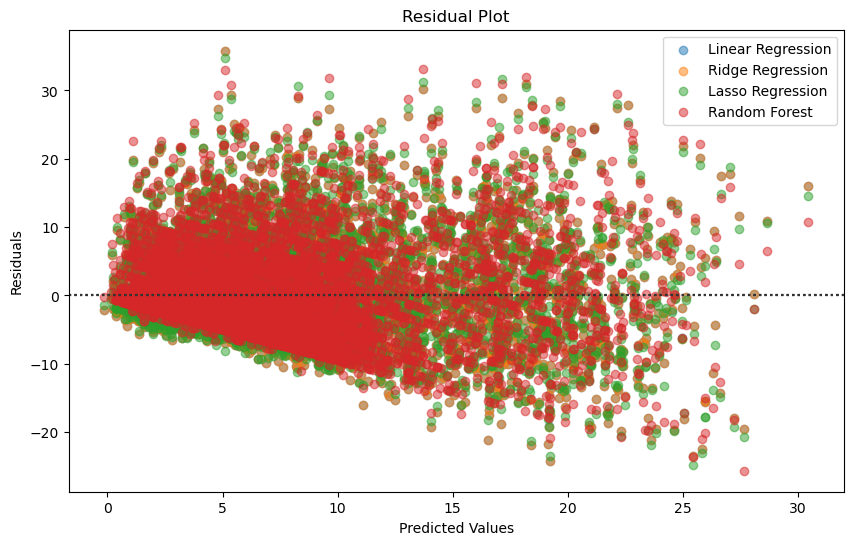

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,6.117386,6.105402,0.381151,0.387874
1,Ridge Regression,6.117386,6.105452,0.381150,0.387864
2,Lasso Regression,6.277928,6.295928,0.348243,0.349074
3,Random Forest,2.395974,6.314363,0.905067,0.345256


In [26]:
regression_pipeline_eval(offense1, 'Target', only_nums=True)

In [27]:
offense2 = offense1.copy()
offense2 = calculate_average_points_last_n_games(offense2,5,'Player')
offense2 = calculate_average_points_last_n_games(offense2,7,'Player')
offense2

,Player,Game,Pts*,Att,Cmp,Yds,TD,Int,2Pt,Rush_Att,...,Rec_2Pt,FL,FL_Rec_TD,Week,Position,Year,Target,3GameAvg,5GameAvg,7GameAvg
7,Aaron Rodgers,GB@JAX,26.0,34,20,199,2,0,0,4,...,0,0,0,1,QB,2016,19.0,26.000000,26.0,26.000000
657,Adam Humphries,TB@ATL,3.0,0,0,0,0,0,0,1,...,0,0,0,1,WR,2016,6.0,3.000000,3.0,3.000000
647,Adam Thielen,MIN@TEN,5.0,0,0,0,0,0,0,0,...,0,0,0,1,WR,2016,4.0,5.000000,5.0,5.000000
3382,Adrian Peterson,MIN@TEN,3.0,0,0,0,0,0,0,19,...,0,0,0,1,RB,2016,1.0,3.000000,3.0,3.000000
699,Albert Wilson,SD@KC,0.0,0,0,0,0,0,0,0,...,0,0,0,1,WR,2016,1.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36253,Wan'Dale Robinson,LA@NYG,13.0,0,0,0,0,0,0,1,...,0,0,0,17,WR,2023,8.0,5.333333,5.6,4.428571
36292,Xavier Gipson,NYJ@CLE,3.0,0,0,0,0,0,0,1,...,0,0,0,17,WR,2023,0.0,2.000000,3.8,2.714286
36334,Xavier Hutchinson,TEN@HOU,0.0,0,0,0,0,0,0,0,...,0,0,0,17,WR,2023,0.0,0.333333,1.0,1.000000
38696,Zach Charbonnet,PIT@SEA,3.0,0,0,0,0,0,0,2,...,0,0,0,17,RB,2023,5.0,1.333333,4.6,4.857143


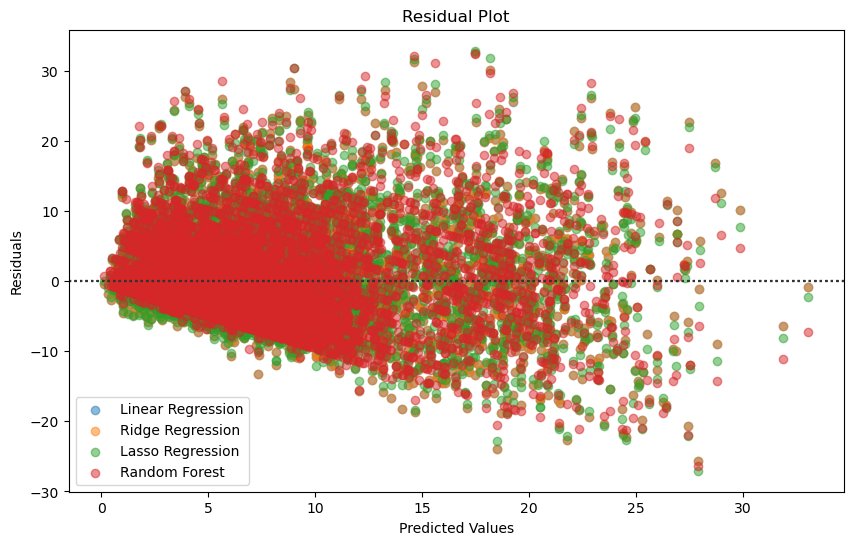

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,6.012252,6.002307,0.402239,0.408372
1,Ridge Regression,6.012252,6.002349,0.402239,0.408364
2,Lasso Regression,6.150210,6.167497,0.374492,0.375360
3,Random Forest,2.314752,6.180448,0.911394,0.372734


In [28]:
regression_pipeline_eval(offense2, 'Target', only_nums=True)

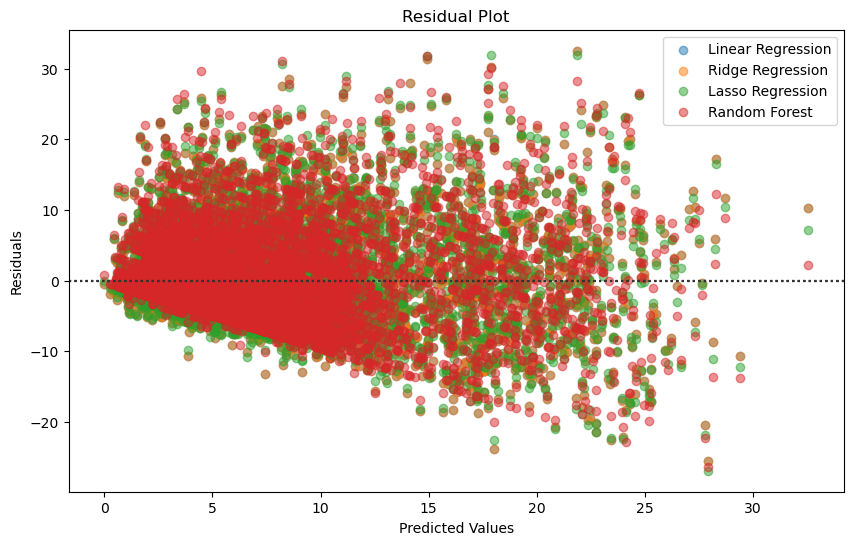

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,6.012092,6.003283,0.402271,0.408180
1,Ridge Regression,6.012092,6.003334,0.402271,0.408170
2,Lasso Regression,6.150101,6.168141,0.374514,0.375229
3,Random Forest,2.302863,6.198141,0.912302,0.369137


In [29]:
offense3 = offense2.copy()
offense3 = calculate_average_points_last_n_games(offense3, 4,'Player')
offense3 = calculate_average_points_last_n_games(offense3, 6,'Player')
regression_pipeline_eval(offense3, 'Target', only_nums=True)

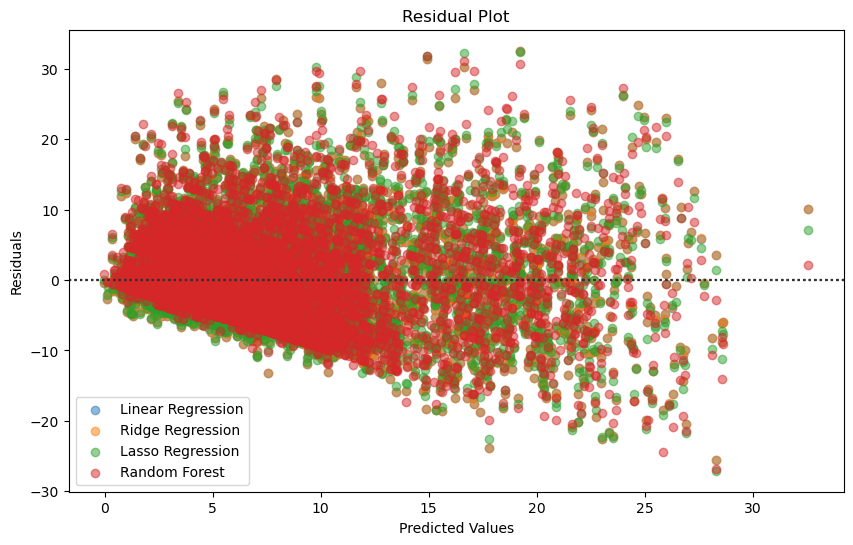

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,6.012092,6.003283,0.402271,0.408180
1,Ridge Regression,6.012092,6.003334,0.402271,0.408170
2,Lasso Regression,6.150101,6.168141,0.374514,0.375229
3,Random Forest,2.304698,6.180150,0.912162,0.372794


In [30]:
regression_pipeline_eval(offense3, 'Target', only_nums=True)

In [61]:
offense4 = offense3.copy()
offense4 = offense4[important]

In [62]:
important = list(offense3.select_dtypes(exclude=['object']).columns) + ['Position']

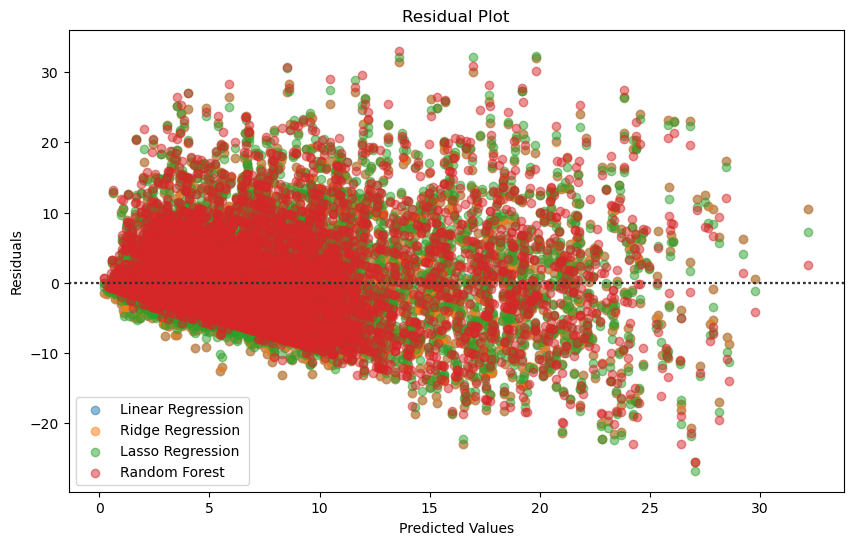

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,5.997061,5.986934,0.405256,0.411399
1,Ridge Regression,5.997061,5.986991,0.405256,0.411388
2,Lasso Regression,6.150101,6.168141,0.374514,0.375229
3,Random Forest,2.298044,6.180351,0.912669,0.372753


In [60]:
regression_pipeline_eval(offense4, 'Target', only_nums=False)

### DST

In [31]:
dst.isnull().sum()

Team         0
Game         0
Pts*         0
Sack         0
Int          0
Saf          0
FR           0
Blk          0
TD           0
PA           0
PassYds      0
RushYds      0
TotYds       0
Week         0
Position     0
Year         0
Target      34
Opponent     0
Home         0
dtype: int64

In [32]:
dst1 = dst.dropna()

In [33]:
dst1

,Team,Game,Pts*,Sack,Int,Saf,FR,Blk,TD,PA,PassYds,RushYds,TotYds,Week,Position,Year,Target,Opponent,Home
0,MIN,MIN@TEN,24.0,2.0,1,0,2,0,2,16,252,64,316,1,DST,2016,15.0,TEN,0
1,SF,LA@SF,16.0,2.0,2,0,0,0,0,0,120,65,185,1,DST,2016,11.0,LA,1
2,MIA,MIA@SEA,16.0,3.0,1,0,1,1,0,12,240,112,352,1,DST,2016,4.0,SEA,0
3,PHI,CLE@PHI,14.0,3.0,1,1,0,0,0,10,168,120,288,1,DST,2016,13.0,CLE,1
4,SEA,MIA@SEA,14.0,5.0,0,0,0,1,0,10,150,64,214,1,DST,2016,10.0,MIA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,LV,LV@IND,2.0,1.0,0,0,0,0,0,23,215,134,349,17,DST,2023,11.0,IND,0
4154,WAS,SF@WAS,2.0,1.0,0,0,0,0,0,27,224,184,408,17,DST,2023,4.0,SF,1
4155,MIN,GB@MIN,2.0,0.0,0,0,1,0,0,33,293,177,470,17,DST,2023,1.0,GB,1
4156,TEN,TEN@HOU,2.0,1.0,0,0,0,0,0,26,201,111,312,17,DST,2023,8.0,HOU,0


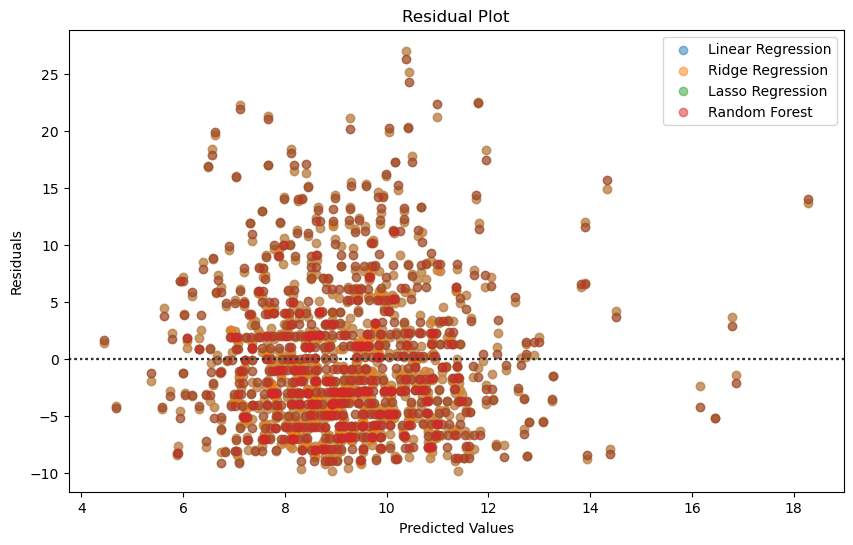

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,6.140477,6.307780,0.007441,-0.004621
1,Ridge Regression,6.140477,6.307759,0.007441,-0.004615
2,Lasso Regression,6.163449,6.293504,0.000000,-0.000079
3,Random Forest,2.348911,6.560195,0.854760,-0.086633


In [34]:
regression_pipeline_eval(dst1, 'Target', only_nums=True)

In [35]:
dst2 = dst1.copy()
dst2 = calculate_average_points_last_n_games(dst2, 2, 'Team')
dst2 = calculate_average_points_last_n_games(dst2, 3, 'Team')
dst2 = calculate_average_points_last_n_games(dst2, 4, 'Team')

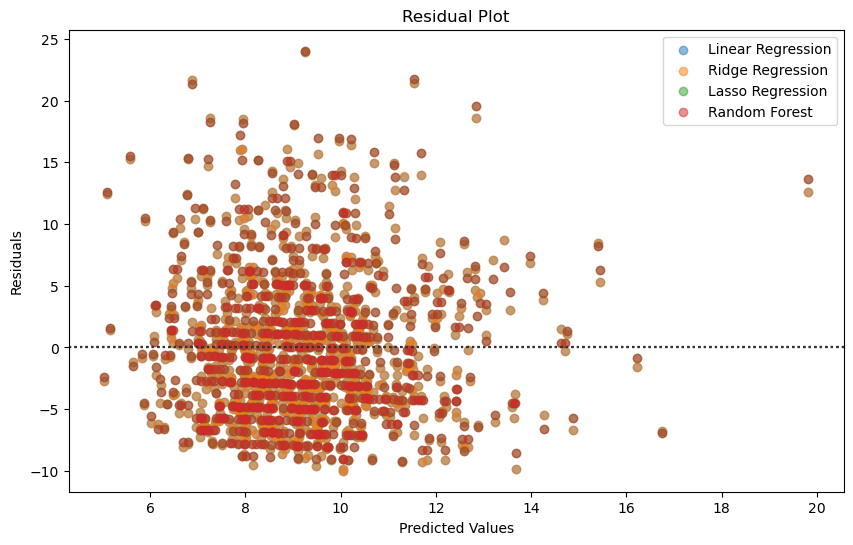

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,6.214427,5.871658,0.014543,0.009440
1,Ridge Regression,6.214428,5.871618,0.014543,0.009453
2,Lasso Regression,6.260116,5.900061,0.000000,-0.000167
3,Random Forest,2.385461,6.092394,0.854796,-0.066437


In [36]:
regression_pipeline_eval(dst2, 'Target', only_nums=True)

In [37]:
dst2 = calculate_average_points_last_n_games(dst2, 5, 'Team')
dst2 = calculate_average_points_last_n_games(dst2, 6, 'Team')
dst2 = calculate_average_points_last_n_games(dst2, 7, 'Team')

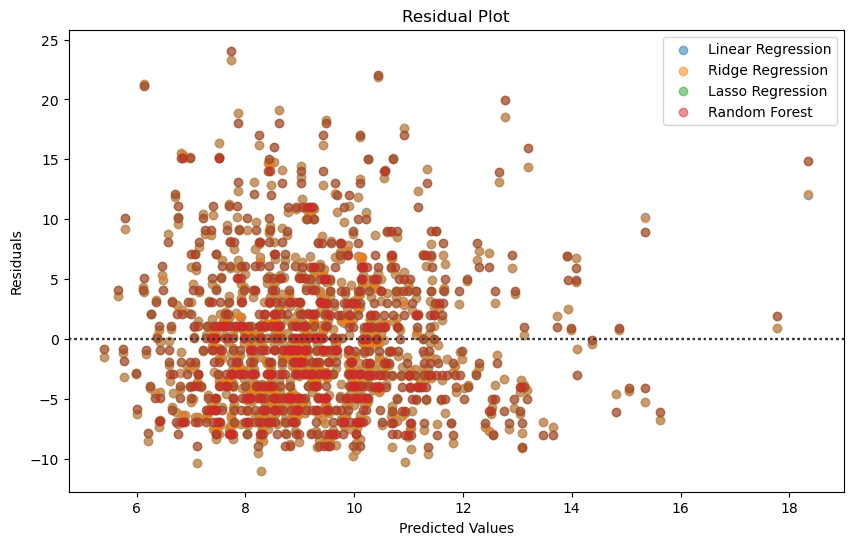

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,6.195495,5.900431,0.020539,-0.000292
1,Ridge Regression,6.195495,5.899953,0.020539,-0.000130
2,Lasso Regression,6.260116,5.900061,0.000000,-0.000167
3,Random Forest,2.367669,6.141590,0.856953,-0.083730


In [38]:
regression_pipeline_eval(dst2, 'Target', only_nums=True)

In [39]:
dst2

,Team,Game,Pts*,Sack,Int,Saf,FR,Blk,TD,PA,...,Year,Target,Opponent,Home,2GameAvg,3GameAvg,4GameAvg,5GameAvg,6GameAvg,7GameAvg
13,ARI,NE@ARI,7.0,2.0,0,0,2,0,0,23,...,2016,26.0,NE,1,7.0,7.000000,7.00,7.0,7.000000,7.000000
26,ATL,TB@ATL,2.0,0.0,1,0,0,0,0,31,...,2016,1.0,TB,1,2.0,2.000000,2.00,2.0,2.000000,2.000000
9,BAL,BUF@BAL,9.0,2.0,0,0,0,0,0,7,...,2016,15.0,BUF,1,9.0,9.000000,9.00,9.0,9.000000,9.000000
5,BUF,BUF@BAL,13.0,4.0,0,0,1,0,0,13,...,2016,9.0,BAL,0,13.0,13.000000,13.00,13.0,13.000000,13.000000
8,CAR,CAR@DEN,9.0,2.0,2,0,1,0,0,21,...,2016,15.0,DEN,0,9.0,9.000000,9.00,9.0,9.000000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4157,SEA,PIT@SEA,1.0,1.0,0,0,0,0,0,30,...,2023,5.0,PIT,1,5.5,6.333333,6.50,6.0,6.500000,6.571429
4137,SF,SF@WAS,12.0,1.0,2,0,0,0,0,10,...,2023,5.0,WAS,0,8.0,9.666667,10.25,9.6,10.833333,11.000000
4151,TB,NO@TB,2.0,1.0,0,0,0,0,0,23,...,2023,17.0,NO,1,10.5,9.666667,9.25,9.4,8.666667,8.142857
4156,TEN,TEN@HOU,2.0,1.0,0,0,0,0,0,26,...,2023,8.0,HOU,0,4.5,8.333333,8.75,8.8,9.500000,8.285714


### Kickers

In [40]:
kickers

,Player,Game,Pts*,XPA,XPM,FGA,FGM,50+,Week,Position,Year,Target
0,Dan Bailey,NYG@DAL,17.0,1,1,4,4,2,1,K,2016,9.0
1,Blair Walsh,MIN@TEN,15.0,2,1,6,4,1,1,K,2016,5.0
2,Stephen Gostkowski,NE@ARI,13.0,2,2,3,3,1,1,K,2016,7.0
3,Jason Myers,GB@JAX,13.0,2,2,3,3,1,1,K,2016,2.0
4,Nick Novak,CHI@HOU,11.0,2,2,3,3,0,1,K,2016,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4128,Jake Moody,LA@SF,2.0,3,2,1,0,0,18,K,2023,NaN
4129,Riley Patterson,CLE@CIN,2.0,2,2,0,0,0,18,K,2023,NaN
4130,Jason Sanders,BUF@MIA,2.0,2,2,0,0,0,18,K,2023,NaN
4131,Brett Maher,LA@SF,1.0,2,1,0,0,0,18,K,2023,NaN


In [41]:
kickers1 = kickers.dropna()

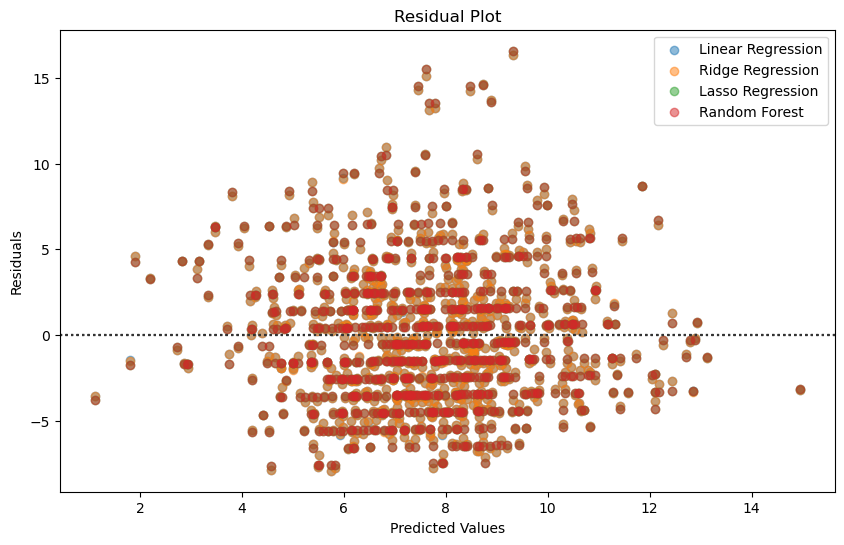

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,3.997562,4.043148,0.006621,-0.001104
1,Ridge Regression,3.997707,4.043195,0.006548,-0.001127
2,Lasso Regression,4.010861,4.043425,0.000000,-0.001241
3,Random Forest,2.055915,4.500040,0.737255,-0.240145


In [42]:
regression_pipeline_eval(kickers1, 'Target', only_nums=True)

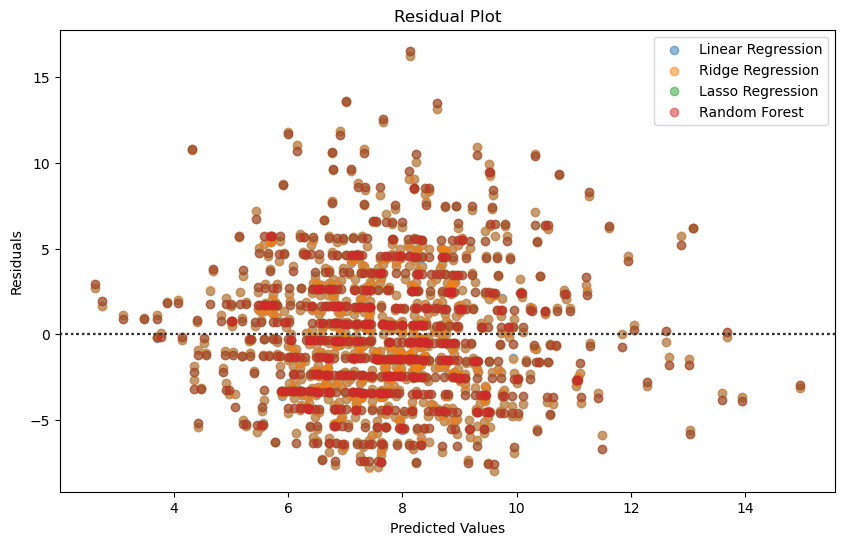

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,4.024419,3.909465,0.008361,0.002711
1,Ridge Regression,4.024558,3.909396,0.008293,0.002747
2,Lasso Regression,4.041350,3.920844,0.000000,-0.003103
3,Random Forest,1.633549,4.204164,0.836615,-0.153308


In [43]:
kickers2 = kickers1.copy()
kickers2 = calculate_average_points_last_n_games(kickers2,2, 'Target')
regression_pipeline_eval(kickers2,'Target')

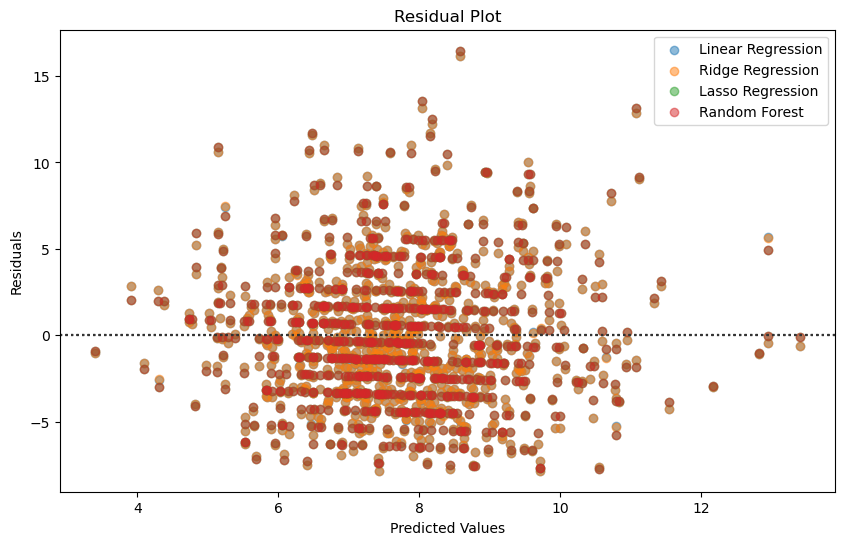

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,4.017134,3.911683,0.011949,0.001579
1,Ridge Regression,4.017272,3.911607,0.011880,0.001618
2,Lasso Regression,4.041350,3.920844,0.000000,-0.003103
3,Random Forest,1.564458,4.097871,0.850144,-0.095728


In [44]:
kickers3 = kickers2.copy()
kickers3 = calculate_average_points_last_n_games(kickers3,3 , 'Target')
regression_pipeline_eval(kickers3,'Target')

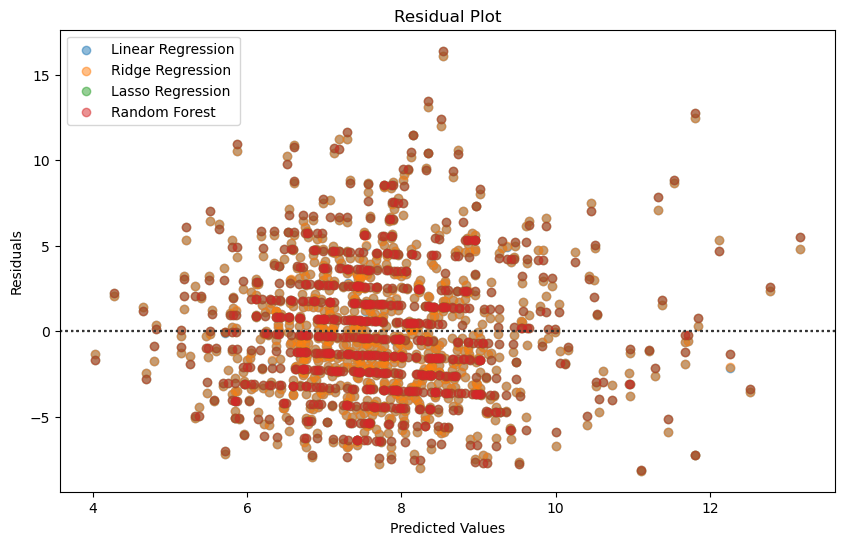

,Model,Training RMSE,Test RMSE,Training R2,Test R2
0,Linear Regression,4.011929,3.904168,0.014507,0.005412
1,Ridge Regression,4.012063,3.904095,0.014441,0.005449
2,Lasso Regression,4.041350,3.920844,0.000000,-0.003103
3,Random Forest,1.549266,4.047327,0.853040,-0.068865


In [45]:
kickers4 = kickers3.copy()
kickers4 = calculate_average_points_last_n_games(kickers4,4 , 'Target')
regression_pipeline_eval(kickers4,'Target')

In [47]:
justin = kickers4[kickers4['Player'] == 'Justin Tucker']


,Player,Game,Pts*,XPA,XPM,FGA,FGM,50+,Week,Position,Year,Target,2GameAvg,3GameAvg,4GameAvg
15,Justin Tucker,BUF@BAL,9.0,1,1,2,2,1,1,K,2016,13.0,9.0,9.333333,9.75
37,Justin Tucker,BAL@CLE,13.0,2,2,3,3,1,2,K,2016,15.0,13.0,13.000000,13.00
64,Justin Tucker,BAL@JAX,15.0,1,1,4,4,1,3,K,2016,7.0,16.0,12.000000,11.25
109,Justin Tucker,OAK@BAL,7.0,1,1,2,2,0,4,K,2016,4.0,7.0,7.000000,7.50
147,Justin Tucker,WAS@BAL,4.0,1,1,1,1,0,5,K,2016,11.0,4.0,9.666667,8.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,Justin Tucker,BAL@LAC,8.0,2,2,3,2,0,12,K,2023,11.0,7.0,7.333333,7.00
3982,Justin Tucker,LA@BAL,11.0,2,2,3,3,0,14,K,2023,11.0,7.0,7.333333,7.00
4012,Justin Tucker,BAL@JAX,11.0,2,2,3,3,0,15,K,2023,15.0,10.0,8.666667,7.75
4042,Justin Tucker,BAL@SF,15.0,3,3,4,4,0,16,K,2023,8.0,9.5,9.000000,7.75
